In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
np.random.seed(42)

n = 500  # número de clientes

dados = {
    'Idade': np.random.randint(18, 65, size=n),
    'Salario': np.random.randint(1500, 15000, size=n),
    'Tempo_Empresa': np.random.randint(0, 20, size=n),
    'Score_Credito': np.random.randint(300, 900, size=n),
    'Valor_Divida': np.random.randint(500, 25000, size=n),
    'Atraso': np.random.choice([0, 1], size=n, p=[0.75, 0.25])  # 25% inadimplente
}

df = pd.DataFrame(dados)

print(df.head())


   Idade  Salario  Tempo_Empresa  Score_Credito  Valor_Divida  Atraso
0     56     5500              3            460         16240       0
1     46     6552              9            315          3673       1
2     32     4238              2            792          2167       0
3     60    13190              8            725          4614       0
4     25     7232             12            407          4053       0


            Idade       Salario  Tempo_Empresa  Score_Credito  Valor_Divida  \
count  500.000000    500.000000      500.00000     500.000000    500.000000   
mean    41.278000   8240.588000        9.16400     595.124000  12577.324000   
std     13.389072   3744.486733        5.80107     172.358206   7093.677149   
min     18.000000   1509.000000        0.00000     300.000000    511.000000   
25%     30.000000   5307.250000        4.00000     450.750000   6608.000000   
50%     42.000000   8262.500000        9.00000     601.500000  11896.000000   
75%     52.000000  11524.250000       14.00000     728.250000  18725.250000   
max     64.000000  14979.000000       19.00000     898.000000  24989.000000   

           Atraso  
count  500.000000  
mean     0.254000  
std      0.435734  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


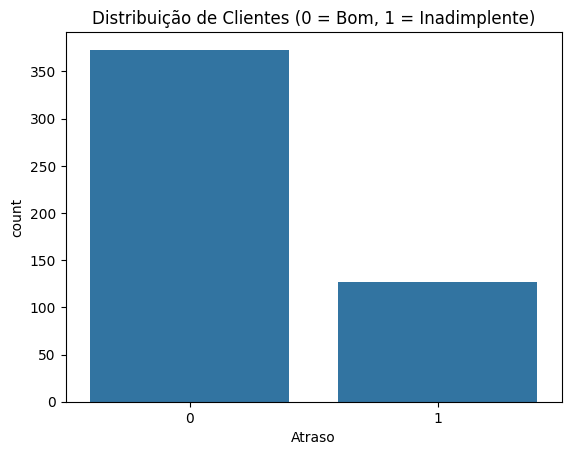

In [3]:
print(df.describe())

sns.countplot(x='Atraso', data=df)
plt.title('Distribuição de Clientes (0 = Bom, 1 = Inadimplente)')
plt.show()


In [4]:
# Definir variáveis independentes (X) e alvo (y)
X = df[['Idade', 'Salario', 'Tempo_Empresa', 'Score_Credito', 'Valor_Divida']]
y = df['Atraso']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
# RandomForest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84       114
           1       0.22      0.06      0.09        36

    accuracy                           0.73       150
   macro avg       0.49      0.50      0.46       150
weighted avg       0.63      0.73      0.66       150



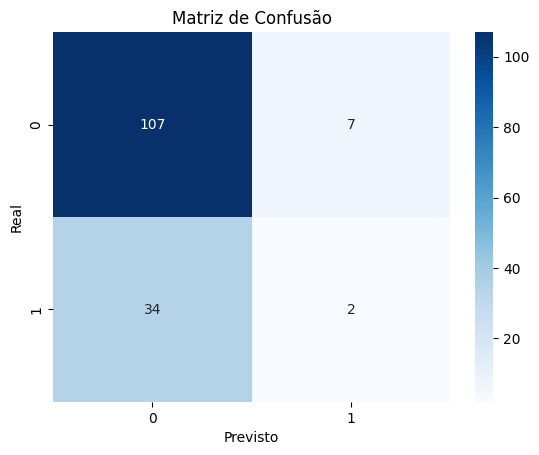

In [7]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


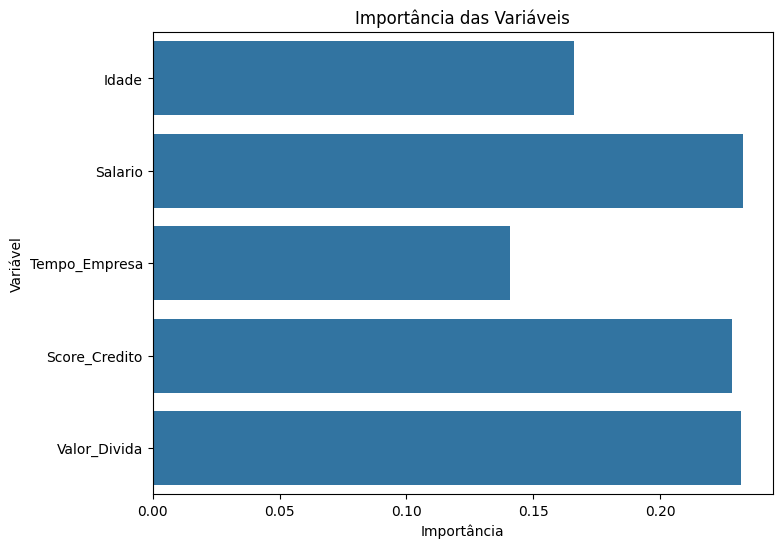

In [8]:
importancias = modelo.feature_importances_
features = X.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importancias, y=features)
plt.title('Importância das Variáveis')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()
